<h1 align='center'> Netflix Movies and TV Shows Recommendation system (NLP) </h1>
<h5 align='center'> ---------------------------------------------------------------------------- </h5>

Name: Logesh.V <br>
Email: vlogesh2001@gmail.com <br>

--------------------------------

### Import Libraries

In [1]:
#Import Libraries
import sys
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

### Data Analysis
<br>Reading the data csv file as dataframe and printing first 5 rows

In [2]:
dff = pd.read_csv("netflix_titles.csv")
print("Dimensions = ",dff.shape)
features = list(dff.columns.values)
print("\nFeatures:\n", features)
print("\nData :")
dff.head()

Dimensions =  (7787, 12)

Features:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
#Data information
print("Info :", dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
Info : None


In [4]:
#Finding Null values in descrption
print("Null count :\n", dff.isnull().sum())
#remove NAN with empty string
dff['description']=dff['description'].fillna('')

Null count :
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [5]:
# top 10 country with higher shows count 
Netflix_top_country = dff['country'].value_counts().head(10)

df2 = pd.DataFrame(Netflix_top_country)

print("Top 10 countries with max show counts: \n", df2)

#Past 5 years shows of netflix
Last_ten_years = dff[dff['release_year']>2015]
print("\nNo.of shows in past 5 years:\n", Last_ten_years['type'].value_counts())

Top 10 countries with max show counts: 
                 country
United States      2555
India               923
United Kingdom      397
Japan               226
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Turkey              100

No.of shows in past 5 years:
 Movie      3125
TV Show    1785
Name: type, dtype: int64


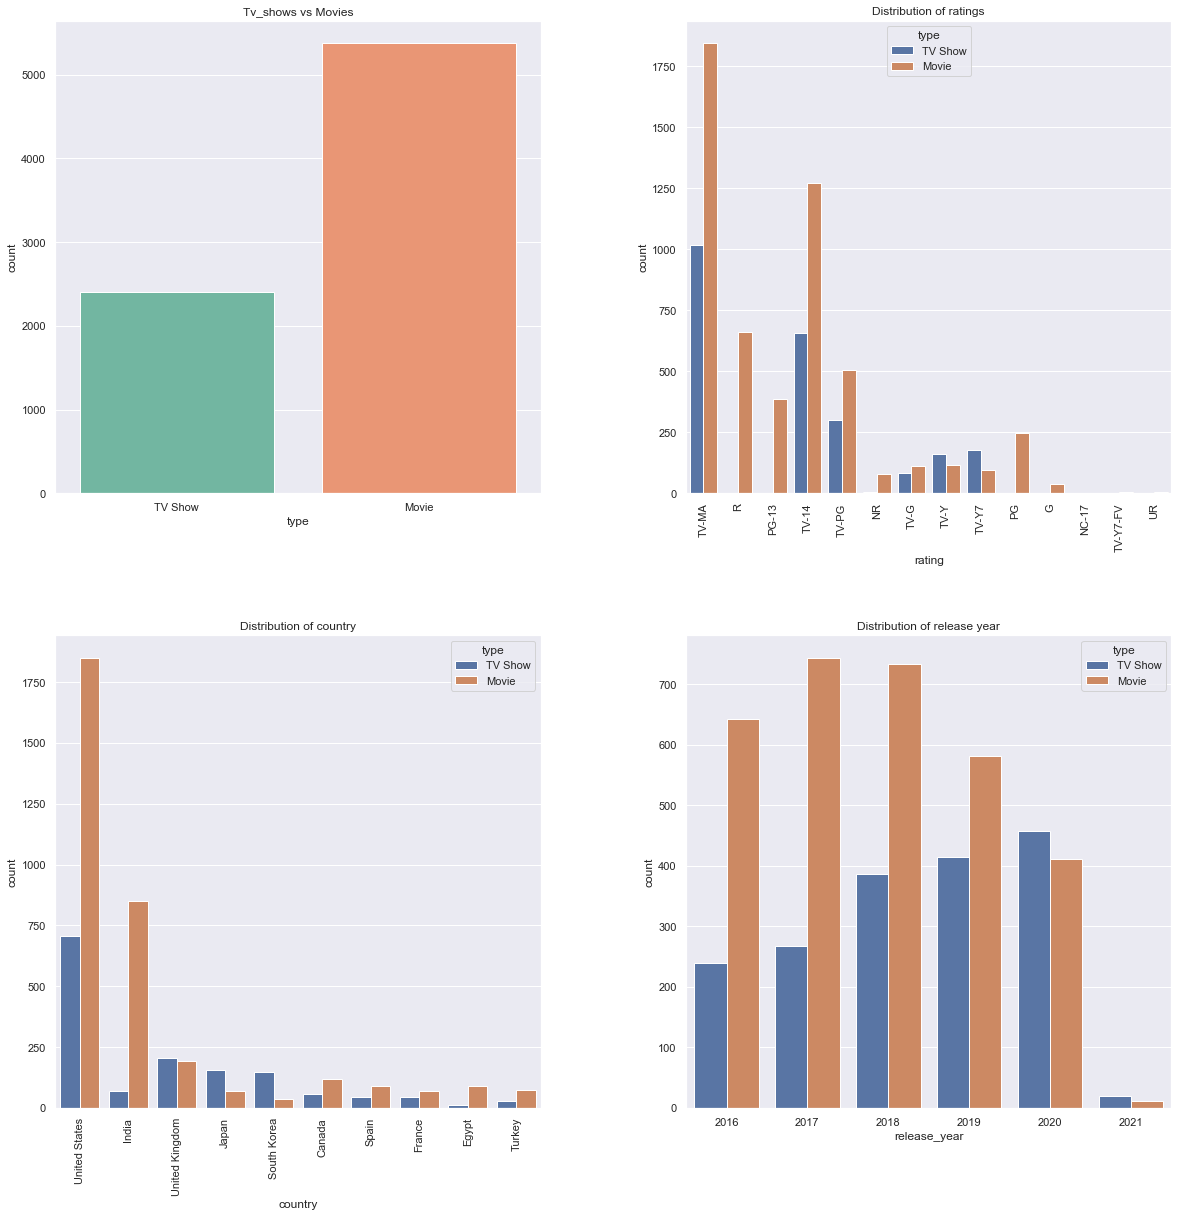

In [6]:
#look at the count of type, rating and country

fig = plt.figure(figsize = (20,20))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.3, hspace=0.3)

sns.set(style="darkgrid")
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])

#set titles and lables
ax0.set_title("Tv_shows vs Movies")
ax1.set_title("Distribution of ratings")
ax2.set_title("Distribution of country")
ax3.set_title("Distribution of release year")

ax1.set_xticklabels(labels=[], rotation= 90)
ax2.set_xticklabels(labels=[], rotation= 90)

#construction subplot

sns.countplot(ax = ax0, x ="type", data = dff, palette="Set2")
sns.countplot(ax = ax1, x = "rating" , hue = "type", data= dff)
sns.countplot(ax = ax2, x = "country" , hue = "type", data= dff, order= dff.country.value_counts().iloc[:10].index)
sns.countplot(ax = ax3, x = "release_year" , hue = "type", data = Last_ten_years)
plt.show()

In [7]:
#First time stopwords are to be download from nltk package
#import nltk
#nltk.download('stopwords')
stopword=stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Extracting desciption of the show and converting to np array
test = np.array(dff.description)
print("\nDimentions of Descriptions:",test.shape)

np.set_printoptions(precision=3, suppress=True, threshold=500) #changing printing options
print("\n\nDescription data: \n", test)


Dimentions of Descriptions: (7787,)


Description data: 
 ['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
 ...
 "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."
 'Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.'
 'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.']


# Natural Language Processing (NLP)

## Preprocessing

In [9]:
#First time WordNet are to be download from nltk package
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words = []
for line in test:
    words.extend(line.strip().split())
test_lem = list(map(lemmatizer.lemmatize, words))
print("Lemmatized words: ", pd.DataFrame(test_lem))

ps = PorterStemmer()
test_stem = [ps.stem(i) for i in test_lem]
print("\n\nStemmed words: ", pd.DataFrame(test_lem))

Lemmatized words:               0
0           In
1            a
2       future
3        where
4          the
...        ...
185532   their
185533  iconic
185534    look
185535     and
185536  sound.

[185537 rows x 1 columns]


Stemmed words:               0
0           In
1            a
2       future
3        where
4          the
...        ...
185532   their
185533  iconic
185534    look
185535     and
185536  sound.

[185537 rows x 1 columns]


## TF-IDF matrix generation

In [10]:
# initializing Vectorizer with English Stopwords
tfidf = TfidfVectorizer(stopword, token_pattern = r'(?u)\b[a-zA-Z][a-zA-Z]+\b')
# we dont need numbers to rate the movie, so numbers in desriptions are removed
feature_matrix = tfidf.fit_transform(test).toarray()
feature_df = pd.DataFrame(feature_matrix)
feature_names = tfidf.get_feature_names()
print("Feature Matrix (Vectorized Description) :\n", feature_matrix)
print("\nFeatured Words are :\n", np.array(feature_names))
print("\nShowing in DataFrame Format:")
pd.DataFrame(feature_matrix, columns = feature_names)

Feature Matrix (Vectorized Description) :
 [[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.302 0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]

Featured Words are :
 ['aaliya' 'aamir' 'aang' ... 'zulu' 'zumbo' 'zurich']

Showing in DataFrame Format:


,aaliya,aamir,aang,aardman,aaron,abad,abagnale,abah,abandon,abandoned,...,zoologist,zordon,zorro,zoya,zozo,zuckerberg,zuhu,zulu,zumbo,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.324484,0.0,0.0,0.0,0.000000,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.301958,0.0


## Netflix Top shows based on Genre Categories
The biggest way to use Netflix category codes is with genres. The list of categories are below.

- Action & Adventure 
- Anime 
- Children & Family 
- Classic 
- Comedies 
- Documentaries 
- Dramas 
- Horror 
- Music 
- Romantic 
- Sci-fi & Fantasy 
- Sports
- Thrillers

In [11]:
#Top 10 shows based on category
#nltk.download('punkt')

def top(category = ''):
    shows = dff[dff['listed_in'].str.contains(category)].reset_index(drop=True)
    shows['Score'] = 0
    for i in range(0, shows.shape[0]):
        words = word_tokenize(shows.iloc[i]['description'])
        value = 0
        for j in words:
            if j in feature_names:
                value = value + feature_df[feature_names.index(j)].sum()
        shows.loc[i, 'Score'] = value
    sc = shows.sort_values(by='Score',ascending=False)
    return sc

In [12]:
#category = input("Enter the Category u want top 10 shows, (Just press enter if u want overall top 10 shows): -> ")
category = 'Drama'
print("Top 10 shows from the given set of shows are:")
top(category).head(10)

Top 10 shows from the given set of shows are:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Score
352,s927,Movie,Billu,Priyadarshan,"Irrfan Khan, Shah Rukh Khan, Lara Dutta, Rajpa...",India,"April 1, 2018",2009,TV-PG,132 min,"Dramas, International Movies",An Indian village is abuzz with news that a ma...,4174.037113
122,s288,Movie,About Time,Richard Curtis,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, ...",United Kingdom,"April 16, 2019",2013,R,123 min,"Comedies, Dramas, International Movies",When Tim learns that the men in his family can...,3869.859171
1260,s3549,TV Show,Lavender,NaN,"Ambrose Hsu, Tammy Chen, Wang Jian Long, Lin W...",Taiwan,"January 15, 2019",2002,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Before one of them moves to the U.S., two chil...",3853.347859
60,s146,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,"July 1, 2017",2011,PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...,3844.920590
2576,s7150,Movie,Too Young the Hero,Buzz Kulik,"Ricky Schroder, Jon DeVries, Debra Mooney, Mar...",United States,"October 1, 2011",1988,TV-MA,94 min,Dramas,Twelve-year-old Calvin manages to join the nav...,3803.751169
1506,s4311,Movie,My Daddy is in Heaven,Waymon Boone,"Jenn Gotzon Chandler, Corbin Bernsen, Lorenzo ...",United States,"June 12, 2018",2017,TV-14,95 min,"Dramas, Faith & Spirituality","After the sudden loss of her husband, a mother...",3707.133748
1063,s2964,Movie,In Family I Trust,Patricia Font,"Clara Lago, Álex García, Carmen Maura, Alexand...",Spain,"May 10, 2019",2018,TV-MA,98 min,"Comedies, Dramas, International Movies","After her partner cheats on her, an architect ...",3622.238637
2662,s7397,Movie,Veerey Ki Wedding,Ashu Trikha,"Pulkit Samrat, Yuvika Chaudhry, Jimmy Shergill...",India,"December 31, 2019",2018,TV-14,130 min,"Comedies, Dramas, International Movies","Quick to throw punches in the name of justice,...",3583.294712
1244,s3509,Movie,Laatu,Manav Shah,"Gagan Kokri, Aditi Sharma, Karamjit Anmol, Sar...",India,"May 2, 2019",2018,TV-PG,116 min,"Comedies, Dramas, International Movies",A man who hopes to bring light to his village ...,3528.143251
2773,s7694,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,3525.787067


## Netflix Top shows based on Watch History (max Past 5 seen shows)


In [13]:
cos_sim_df = pd.DataFrame(cosine_similarity(feature_matrix)) #Finding Similarity Matrix
cos_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7777,7778,7779,7780,7781,7782,7783,7784,7785,7786
0,1.000000,0.029483,0.059846,0.042073,0.008050,0.000000,0.017130,0.039546,0.008964,0.025459,...,0.005292,0.017105,0.019678,0.110758,0.038556,0.007482,0.009469,0.026143,0.011802,0.027053
1,0.029483,1.000000,0.006905,0.017450,0.011009,0.000000,0.029559,0.068154,0.004086,0.013980,...,0.031148,0.010889,0.067015,0.011697,0.028667,0.014022,0.028683,0.097194,0.000000,0.000000
2,0.059846,0.006905,1.000000,0.003323,0.000000,0.020417,0.043930,0.010684,0.018040,0.068658,...,0.000000,0.013217,0.010506,0.064808,0.018906,0.026863,0.022591,0.003618,0.013628,0.011373
3,0.042073,0.017450,0.003323,1.000000,0.045078,0.000000,0.033523,0.015915,0.002895,0.009687,...,0.010256,0.030438,0.003145,0.014078,0.013277,0.011426,0.071740,0.018165,0.010288,0.008738
4,0.008050,0.011009,0.000000,0.045078,1.000000,0.006802,0.000000,0.050100,0.014255,0.035448,...,0.021847,0.031896,0.040352,0.002735,0.024996,0.028482,0.015059,0.017199,0.002442,0.008477


### Funtion: Get Recommendations
`Parameters are:`
- titles: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ----- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; watch-history of all shows u have recently watched

- no_of_recom: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ----- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; No. of recommendations user require, default = 10

- show_watched_shows_also: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ----- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To show the recently watched shows along with recomendations

- cos_sim_df: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ----- &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Cosine-Similarity Matrix of our entire dataset, even updated Matrix can be passed as a parameter

In [14]:
def get_recommendations(titles = [], no_of_recom = 10, show_watched_shows_also = False, cos_sim_df = cos_sim_df):
        
    #geting the index of the matched title in the dataset
    ind = []
    for title in titles:
        ind.extend(dff.index[dff['title'].str.contains(title)].tolist())
    
    # no of recently watched shows (history)
    n = len(ind)
    if (n <= 0):
        n = dff.shape[0]
        ind.extend(dff.index.tolist())
        #if no watch history, give recomendation generally based on all shows
    
    #finding all the similarity score of given title corresponding to other titles
    #we are also enumerating to remember the indices of the corresponding movie titles
    sim_scores=list(enumerate(cos_sim_df[ind].sum(axis = 1, skipna = True)))
    
    
    #sorting the movies based on the similarity score based on 2nd value, as the list
    #enumerated is form (index, similarity score)
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #First score will be complete 1.0, as the first match is the same show titles itself
    #so we will ignore first title, the next 10 similarity score is suggested
    
    if (n == dff.shape[0]):
        n = 0
    elif (n >= dff.shape[0] - no_of_recom):
        n = dff.shape[0] - no_of_recom
        
    # option to show watched shows also
    if (show_watched_shows_also):
        sim_scores=sim_scores[0:n+no_of_recom]
    else:
        sim_scores=sim_scores[n:n+no_of_recom]
    
    show_indices = [j[0] for j in sim_scores]  #getting the show indices corresponding to dataset
    return dff.iloc[show_indices]  #returning the top 10 recommended shows

In [15]:
#change ur watch history here (if u r new with no watch history, give empty list)
watch_history = ['Troy', 'The Matrix', 'Tom and Jerry']

print("Top 10 shows from the given set of shows are:")
get_recommendations(watch_history, no_of_recom = 10, show_watched_shows_also = True)

Top 10 shows from the given set of shows are:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6649,s6650,Movie,The Matrix Reloaded,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",2003,R,138 min,"Action & Adventure, Sci-Fi & Fantasy","The crew must protect Zion, the last outpost s..."
7238,s7239,TV Show,Troy,NaN,"Louis Hunter, Bella Dayne, Frances O'Connor, D...","United Kingdom, South Africa, Australia, Unite...","April 6, 2018",2018,TV-MA,1 Season,"British TV Shows, International TV Shows, Roma...",Searching for the woman promised to him by Aph...
6650,s6651,Movie,The Matrix Revolutions,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",2003,R,129 min,"Action & Adventure, Sci-Fi & Fantasy",The final installment in the Matrix trilogy fi...
6648,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...
7134,s7135,Movie,Tom and Jerry: The Magic Ring,Phil Roman,"Richard Kind, Dana Hill, Anndi McAfee, Tony Ja...",NaN,"December 15, 2019",2001,TV-Y7,60 min,"Children & Family Movies, Comedies",When a young wizard leaves Tom to guard his pr...
7239,s7240,Movie,Troy: The Odyssey,Tekin Girgin,"Dylan Vox, Lara Heller, Hachem Hicham, David G...",United States,"March 12, 2018",2017,TV-MA,90 min,Action & Adventure,"Starting with the Trojan Horse attack, this mo..."
5493,s5494,TV Show,Sense8,NaN,"Tuppence Middleton, Brian J. Smith, Doona Bae,...",United States,"December 23, 2016",2018,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","From the creators of ""The Matrix"" and ""Babylon..."
2873,s2874,TV Show,Huntik: Secrets and Seekers,NaN,"Yuri Lowenthal, Drew Aaron, Karen Strassman, M...","United States, Italy","January 1, 2018",2011,TV-Y7,2 Seasons,Kids' TV,A high school student searching for his missin...
5428,s5429,Movie,Scary Movie,Keenen Ivory Wayans,"Anna Faris, Jon Abrahams, Shannon Elizabeth, S...",United States,"January 1, 2020",2000,R,88 min,"Comedies, Horror Movies",The Wayans brothers spoof some of Hollywood's ...
1069,s1070,Movie,Boyka: Undisputed,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...","Bulgaria, United States","August 1, 2019",2016,R,90 min,Action & Adventure,The fourth film in the action franchise finds ...


--------------------------------------------------------------------------------------------------
### x---------------------------- Thanking You ----------------------------x
--------------------------------------------------------------------------------------------------